Problem Statement for the Advertising data

The dataset file consists of advertising expenditure incurred on different mediums and the overall increase in revenue that was seen during that time. For any business, advertising their products is very essential because it aids in the fast selling of a product, increases the popularity and awareness of the product in the market, which in turn, increases the overall sales for the product. But more than that, what matters for the business is that correct amount of investment should be done upon the advertisements such that it generates good return on investments otherwise it will just lead to an added expenditure.
The dataset contains statistics about the increase in sales of a product in 200 different months, together with advertising budgets in each of these months for different media channels: TV, radio and newspaper. The budget and the increase in sales is in thousands of dollars.

You are expected to implement regression technique and predict what would be the increase in sales given the advertisement expenditure for that month. You are free to use any ML algorithms, evaluate, fine tune and reach a best model. Also derive additional/meaningful insights from the data which can help the organization to decide upon the right channels and amount of investments to be done on each media channel. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Csv Files\Advertising.csv",index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


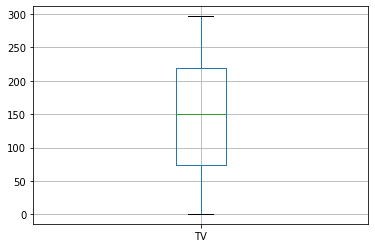

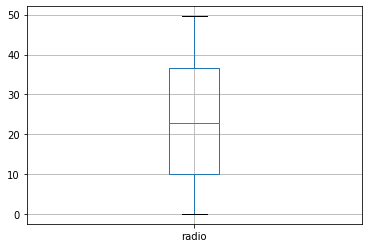

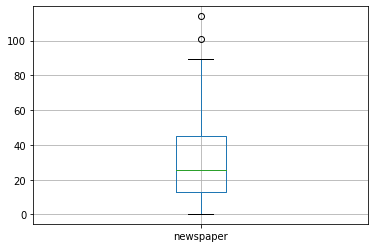

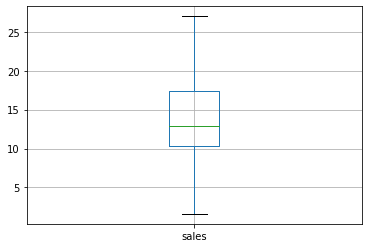

In [4]:
#Assumption 1: There should be no outliers in the data
#Check using boxplot.
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

If we find out extreme outlier we eliminate them or treat them before proceeding.

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

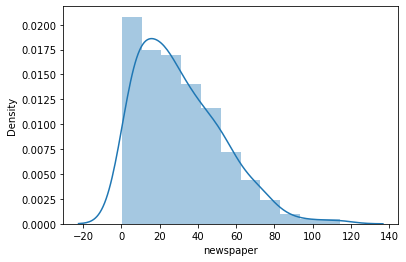

In [5]:
sns.distplot(df.newspaper)

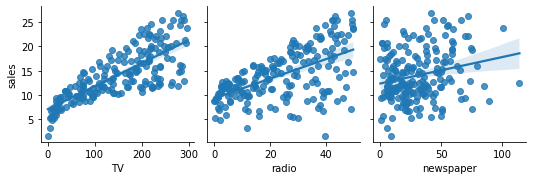

In [6]:
#Assumption 2: Assumption of linerarity: Every ind var should have a 
#linear relationship with the dep var

sns.pairplot(df,x_vars=["TV","radio","newspaper"],y_vars="sales",kind="reg")

when there is situation when there is no linear relation so either we can drop that varibale,but in 
some case that variable is important we cant drop it so we have to switch the algo

In [7]:
#create X and Y
x=df[["TV","radio","newspaper"]]
y=df["sales"]
#x=df.iloc[:,0:-1]
#y=df.iloc[:-1]

In [8]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


C:\Users\shrey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

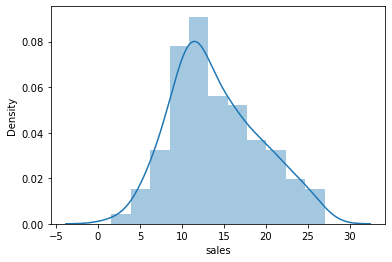

In [9]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribution.
sns.distplot(y)

If y doesnot follows a normal distribution you can go towards log transform

In [10]:
'''log Transformation
y_log=np.log(y)'''

'log Transformation\ny_log=np.log(y)'

In [11]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna()))#will drop null values and will display the skew value of i iterate variable
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
print(data_num_skew)
print()
print(data_num_skewed)
print()
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])
#log1p=It is use to avoid getting a infinite value when the data consist of 0 value find by min of data else use np.log only

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64

newspaper    0.887996
dtype: float64



C:\Users\shrey\AppData\Local\Temp\ipykernel_19392\2120979048.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


<AxesSubplot:>

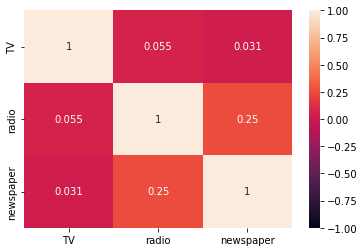

In [12]:
#Asusumption of no multicollinearity: There should be no multicollinearity between the independent varaibles.
#Multicollinearity is the relationship amongst the independent variables.
corr_df=x.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range((len(x.columns)))]
vif_df.round(2),

#X.drop("newspaper",axis=1,inplace=True)
#return the VIF code

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


# Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10) 
#random state takes random sample from data

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


# Creating the model

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Training the model

In [17]:
lm.fit(x_train,y_train)

LinearRegression()

In [18]:
print(lm.intercept_)  #Beta_0
print(lm.coef_) #Beta1,Beta2,....Beta_n

3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]


# Equation Generation

In [19]:
cdf= pd.DataFrame(lm.coef_,x.columns,columns=['Coefficent'])
cdf

,Coefficent
TV,0.043743
radio,0.193037
newspaper,-0.048951


In [20]:
print(list(zip(x.columns,lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.193037078973453), ('newspaper', -0.048951368222487926)]


1000 dollars investment increase in **TV** is associated with an **increase of \$0.043743**.
 
 1000 dollars investment increase in **radio** is associated with an **increase of \$0.193037**.
 
 1000 dollars investment increase in **newspaper** is associated with an **decrease of \$0.048951**

In [21]:
x1=100
x2=200
x3=np.log1p(0)
y_pred=3.353291385815151+(0.0437425*x1)+(0.19303708*x2)+(-0.04895137*x3)
y_pred

46.33495738581515

# Predicting the model

In [22]:
y_pred=lm.predict(x_test)

In [23]:
y_pred

array([18.15026866, 12.96136899, 18.05815332, 23.66025079, 20.68751041,
       14.26325872, 14.92774472, 21.38847375, 21.14752911, 12.75788534,
       23.99735583,  7.20632737, 12.30777109, 19.22813333, 19.41581583,
       13.44985803, 19.62619644,  9.24667496, 21.1052867 , 20.87838433,
       15.52611251, 10.91695579, 22.82910679, 15.82915597, 17.40742204,
        8.17170435, 11.88738387, 12.69866637, 21.71275044,  7.94920205,
       12.49118989, 20.43292079,  4.71443086,  4.72126238, 16.7504848 ,
       15.74384945,  6.74775596, 17.73750244,  9.01170001, 13.60841593])

In [24]:
new_df=pd.DataFrame()
new_df=x_test.copy()

new_df["Actual sales"]=y_test
new_df["Predicted sales"]=y_pred
new_df
new_df=new_df.reset_index().drop("index",axis=1)

In [25]:
lm.score(x_train,y_train)

0.9208986647500219

<AxesSubplot:>

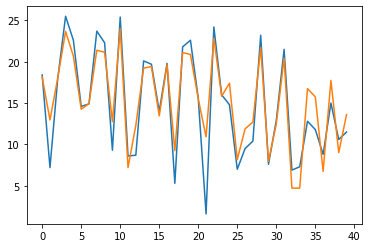

In [26]:
new_df["Actual sales"].plot()
new_df["Predicted sales"].plot()

# Evalution

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [28]:
print(y_test.min())
print(y_test.max())

1.6
25.5


In [29]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


<AxesSubplot:xlabel='sales'>

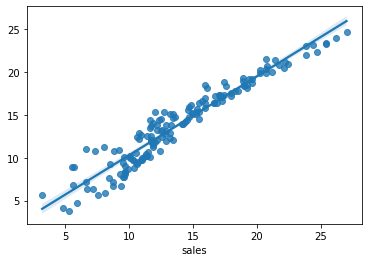

In [30]:
sns.regplot(x=y_train,y=lm.predict(x_train),ci=95)  #ci is confidence interval

# Tuning the model (can do feature selection for better model)

# Using Ridge

In [31]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(x_train,y_train)

print(rdg.intercept_)
print(rdg.coef_)

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [32]:
y_pred=rdg.predict(x_test)

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975934
RMSE: 2.592920462683998
Adj R-square: 0.832279819566434


# Using Lasso

In [34]:
#As the R square value is increasing we can say that there is a slight change 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(x_train,y_train)

print(las.intercept_)
print(las.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [35]:
y_pred=las.predict(x_test)

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
print()
print("The previous values for linear regression without tuning  were 3.353291385815149,[ 0.0437425, 0.19303708 ,-0.04895137] ")
print("The previous values for linear regression with tuning by ridge  were 3.3522471725965985,[ 0.04374234  0.19302603 -0.04853131]")
print("The previous values for linear regression with tuning by lasso were 3.336794058220317,[ 0.04362374  0.18766033 -0.] ")

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292

The previous values for linear regression without tuning  were 3.353291385815149,[ 0.0437425, 0.19303708 ,-0.04895137] 
The previous values for linear regression with tuning by ridge  were 3.3522471725965985,[ 0.04374234  0.19302603 -0.04853131]
The previous values for linear regression with tuning by lasso were 3.336794058220317,[ 0.04362374  0.18766033 -0.] 


# Using OLS-->StatsModel

Train the model on the entire data only one and then use it for predictions.

In [37]:
new_df=pd.DataFrame()
new_df=x_train.copy()

new_df["sales"]=y_train.copy()
new_df.shape

(160, 4)

In [38]:
import statsmodels.formula.api as sm

#create a fitted model with all three features
lm_model = sm.ols(formula="sales ~ TV + radio + newspaper",
                 data=new_df).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.10e-85
Time:                        10:18:32   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [39]:
y_pred_new=lm_model.predict(x_test)

In [40]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529


# Without Newspaper

In [41]:
import statsmodels.formula.api as sm

#create a fitted model with all three features
lm_model = sm.ols(formula="sales ~ TV + radio",
                 data=new_df).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           3.47e-87
Time:                        10:18:33   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [42]:
y_pred_new_=lm_model.predict(x_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred_new_)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred_new_))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


# Post-Model building

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

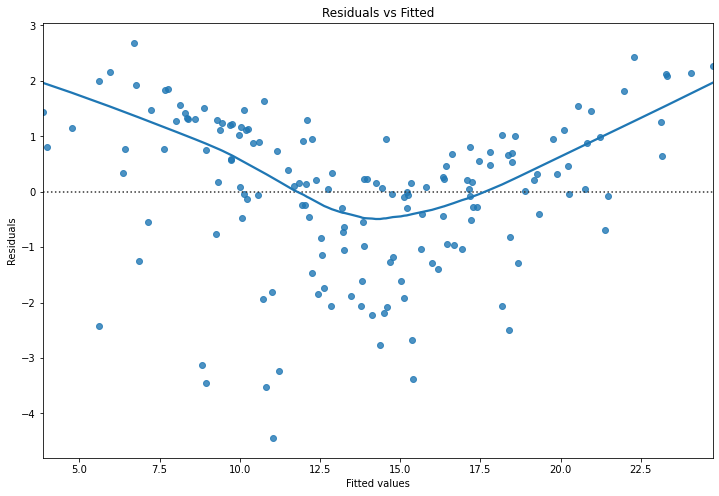

In [45]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

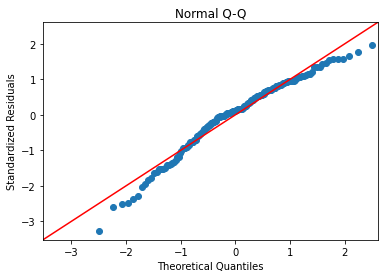

In [47]:
##Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot

res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

The error points should follow the red diagonal line to indicates that they follow normal distribution.

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

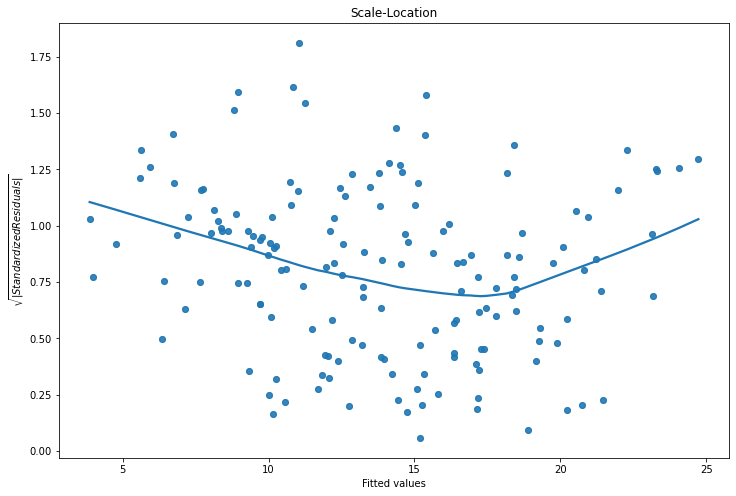

In [48]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot

# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

We should get approximately horizontal line, i.e the line should not have stiff angle